### Basic QC for non-human primate samples (Hughes)

#### Objective: Run basic QC for week 4 BAL samples in non-human primates from Hughes et al 2020


- **Developed by**:  Mairi McClean
- **Computational Health Centre - Helmholtz Munich**
- v230403

### Load modules

In [1]:
import anndata
import logging
import scrublet
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import igraph as ig
from matplotlib import colors
from matplotlib import rcParams

### Log files and figure output settings

In [2]:
%matplotlib inline
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
jupyter_events      0.6.3
ju

### Read in data


In [3]:
adata_1 = sc.read_h5ad('/Volumes/LaCie/data_lake/Carlos_example/Hughes2020/SCP1749/SCP1749_4WPI_granuloma_nHP.raw.h5ad')
adata_1

AnnData object with n_obs × n_vars = 10006 × 24820
    obs: 'nCount_RNA', 'nFeature_RNA', 'biosample_id', 'donor_id', 'CellTypeAnnotations', 'Log10_CFU', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'sex', 'is_living', 'paired_ends', 'end_bias', 'biosample_type', 'disease__time_since_onset', 'disease__time_since_onset__unit', 'disease__time_since_onset__unit_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label'
    var: 'gene_ids'

In [4]:
adata_1.obs['biosample_type'].value_counts()

biosample_type
PrimaryBioSample_Tissue    10006
Name: count, dtype: int64

In [5]:
adata_1.obs['cell_type__ontology_label'].value_counts()

cell_type__ontology_label
macrophage                            5430
T cell                                2713
neutrophil                             437
type II pneumocyte                     367
mast cell                              364
B cell                                 206
fibroblast                             139
endothelial cell                       122
club cell                               94
plasmacytoid dendritic cell, human      90
plasma cell                             44
Name: count, dtype: int64

In [6]:
adata_2 = sc.read_h5ad('/Volumes/LaCie/data_lake/Carlos_example/Hughes2020/SCP257/SCP257_10WPI_granuloma_nHP_1.raw.h5ad')
adata_2

AnnData object with n_obs × n_vars = 50000 × 28155
    obs: 'CellID', 'GenericFinal', 'SpecificFinal', 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'disease__time_since_onset', 'biosample_id', 'biosample_type', 'disease', 'disease__ontology_label', 'donor_id', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'is_living', 'sex', 'disease__time_since_onset__unit_label', 'disease__time_since_onset__unit', 'Log10_CFU_per_granuloma', 'Log10_CEQ_per_granuloma', 'log_CFU_CEQ_ratio_per_granuloma', 'Size_4_wks', 'Size_8_wks', 'Size_10_wks', 'SUV_4_wks', 'SUV_8_wks', 'SUV_10_wks', 'paired_ends', 'end_bias', 'CellTypeGroup', 'GranulomaBurden', 'GranulomaTiming'

In [7]:
adata_2.obs['cell_type'].value_counts()

cell_type
CL_0000084    18108
CL_0000235    12394
CL_0000236     4994
CL_0000097     3429
CL_0000057     2995
CL_0000786     2178
CL_0002063     1551
CL_0000775     1275
CL_0000115     1089
CL_0001058      629
CL_0000232      595
CL_0000941      531
CL_0002062      232
Name: count, dtype: int64

In [8]:
adata_2.obs['cell_type__ontology_label'].value_counts()

cell_type__ontology_label
T cell                                18108
macrophage                            12394
B cell                                 4994
mast cell                              3429
fibroblast                             2995
plasma cell                            2178
type II pneumocyte                     1551
neutrophil                             1275
endothelial cell                       1089
plasmacytoid dendritic cell, human      629
erythrocyte                             595
thymic conventional dendritic cell      531
type I pneumocyte                       232
Name: count, dtype: int64

In [9]:
adata_3 = sc.read_h5ad('/Volumes/LaCie/data_lake/Carlos_example/Hughes2020/SCP257/SCP257_10WPI_granuloma_nHP_2.raw.h5ad')
adata_3

AnnData object with n_obs × n_vars = 59584 × 28155
    obs: 'CellID', 'GenericFinal', 'SpecificFinal', 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'disease__time_since_onset', 'biosample_id', 'biosample_type', 'disease', 'disease__ontology_label', 'donor_id', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'is_living', 'sex', 'disease__time_since_onset__unit_label', 'disease__time_since_onset__unit', 'Log10_CFU_per_granuloma', 'Log10_CEQ_per_granuloma', 'log_CFU_CEQ_ratio_per_granuloma', 'Size_4_wks', 'Size_8_wks', 'Size_10_wks', 'SUV_4_wks', 'SUV_8_wks', 'SUV_10_wks', 'paired_ends', 'end_bias', 'CellTypeGroup', 'GranulomaBurden', 'GranulomaTiming'

In [10]:
adata_2.obs['cell_type'].value_counts()

cell_type
CL_0000084    18108
CL_0000235    12394
CL_0000236     4994
CL_0000097     3429
CL_0000057     2995
CL_0000786     2178
CL_0002063     1551
CL_0000775     1275
CL_0000115     1089
CL_0001058      629
CL_0000232      595
CL_0000941      531
CL_0002062      232
Name: count, dtype: int64

In [11]:
adata_3.obs['cell_type__ontology_label'].value_counts()

cell_type__ontology_label
T cell                                26658
macrophage                            15276
B cell                                 4419
mast cell                              3718
neutrophil                             2325
plasma cell                            1844
type II pneumocyte                     1616
erythrocyte                             865
plasmacytoid dendritic cell, human      837
thymic conventional dendritic cell      749
endothelial cell                        619
fibroblast                              546
type I pneumocyte                       112
Name: count, dtype: int64

### Make names unique

In [12]:
adata_1.var_names_make_unique()
adata_2.var_names_make_unique()
adata_3.var_names_make_unique()

#### Concatenate objects

In [13]:
adata_merged = adata_1.concatenate(adata_2, adata_3, join="outer", batch_key="object_number", batch_categories=['1', '2', '3'])
adata_merged

/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 119590 × 30864
    obs: 'nCount_RNA', 'nFeature_RNA', 'biosample_id', 'donor_id', 'CellTypeAnnotations', 'Log10_CFU', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'sex', 'is_living', 'paired_ends', 'end_bias', 'biosample_type', 'disease__time_since_onset', 'disease__time_since_onset__unit', 'disease__time_since_onset__unit_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'CellID', 'GenericFinal', 'SpecificFinal', 'Log10_CFU_per_granuloma', 'Log10_CEQ_per_granuloma', 'log_CFU_CEQ_ratio_per_granuloma', 'Size_4_wks', 'Size_8_wks', 'Size_10_wks', 'SUV_4_wks', 'SUV_8_wks', 'SUV_10_wks', 'CellTypeGroup', 'GranulomaBurden', 'GranulomaTiming', 'object_number'
    var: 'gene_ids-1'

### Pre-processing

In [14]:
adata_merged.var

,gene_ids-1
A1BG,NaN
A1CF,NaN
A2ML1,A2ML1
A3GALT2,A3GALT2
A4GALT,A4GALT
...,...
rna76594,rna76594
rna76595,NaN
rna76596,rna76596
rna76597,NaN


In [15]:
adata_merged.obs

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,Size_4_wks,Size_8_wks,Size_10_wks,SUV_4_wks,SUV_8_wks,SUV_10_wks,CellTypeGroup,GranulomaBurden,GranulomaTiming,object_number
Array4_23118_TATTACCCCGCA-1,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Array4_23118_CTCTTCCGCCTA-1,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Array4_23118_CATGTCTCCTGC-1,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Array4_23118_GTAACTCCCCGA-1,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Array4_23118_CGCCGTCTGATC-1,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array9_4017_TTTTTGAGGCCT-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,0.0,0.0,3.8,0.0,0.0,5.02,Group2,HighBurden,Early,3
Array9_4017_TTTTTGGAAACC-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,0.0,0.0,3.8,0.0,0.0,5.02,nan,HighBurden,Early,3
Array9_4017_TTTTTGTGCCTC-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,0.0,0.0,3.8,0.0,0.0,5.02,Group3,HighBurden,Early,3
Array9_4017_TTTTTTAAAGAT-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,0.0,0.0,3.8,0.0,0.0,5.02,Group1,HighBurden,Early,3


In [16]:
adata_merged.X

<119590x30864 sparse matrix of type '<class 'numpy.float32'>'
	with 107162700 stored elements in Compressed Sparse Row format>

In [17]:
sample_object = adata_merged.copy()
sample_object

AnnData object with n_obs × n_vars = 119590 × 30864
    obs: 'nCount_RNA', 'nFeature_RNA', 'biosample_id', 'donor_id', 'CellTypeAnnotations', 'Log10_CFU', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'sex', 'is_living', 'paired_ends', 'end_bias', 'biosample_type', 'disease__time_since_onset', 'disease__time_since_onset__unit', 'disease__time_since_onset__unit_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'CellID', 'GenericFinal', 'SpecificFinal', 'Log10_CFU_per_granuloma', 'Log10_CEQ_per_granuloma', 'log_CFU_CEQ_ratio_per_granuloma', 'Size_4_wks', 'Size_8_wks', 'Size_10_wks', 'SUV_4_wks', 'SUV_8_wks', 'SUV_10_wks', 'CellTypeGroup', 'GranulomaBurden', 'GranulomaTiming', 'object_number'
    var: 'gene_ids-1'

In [18]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

#### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:00)


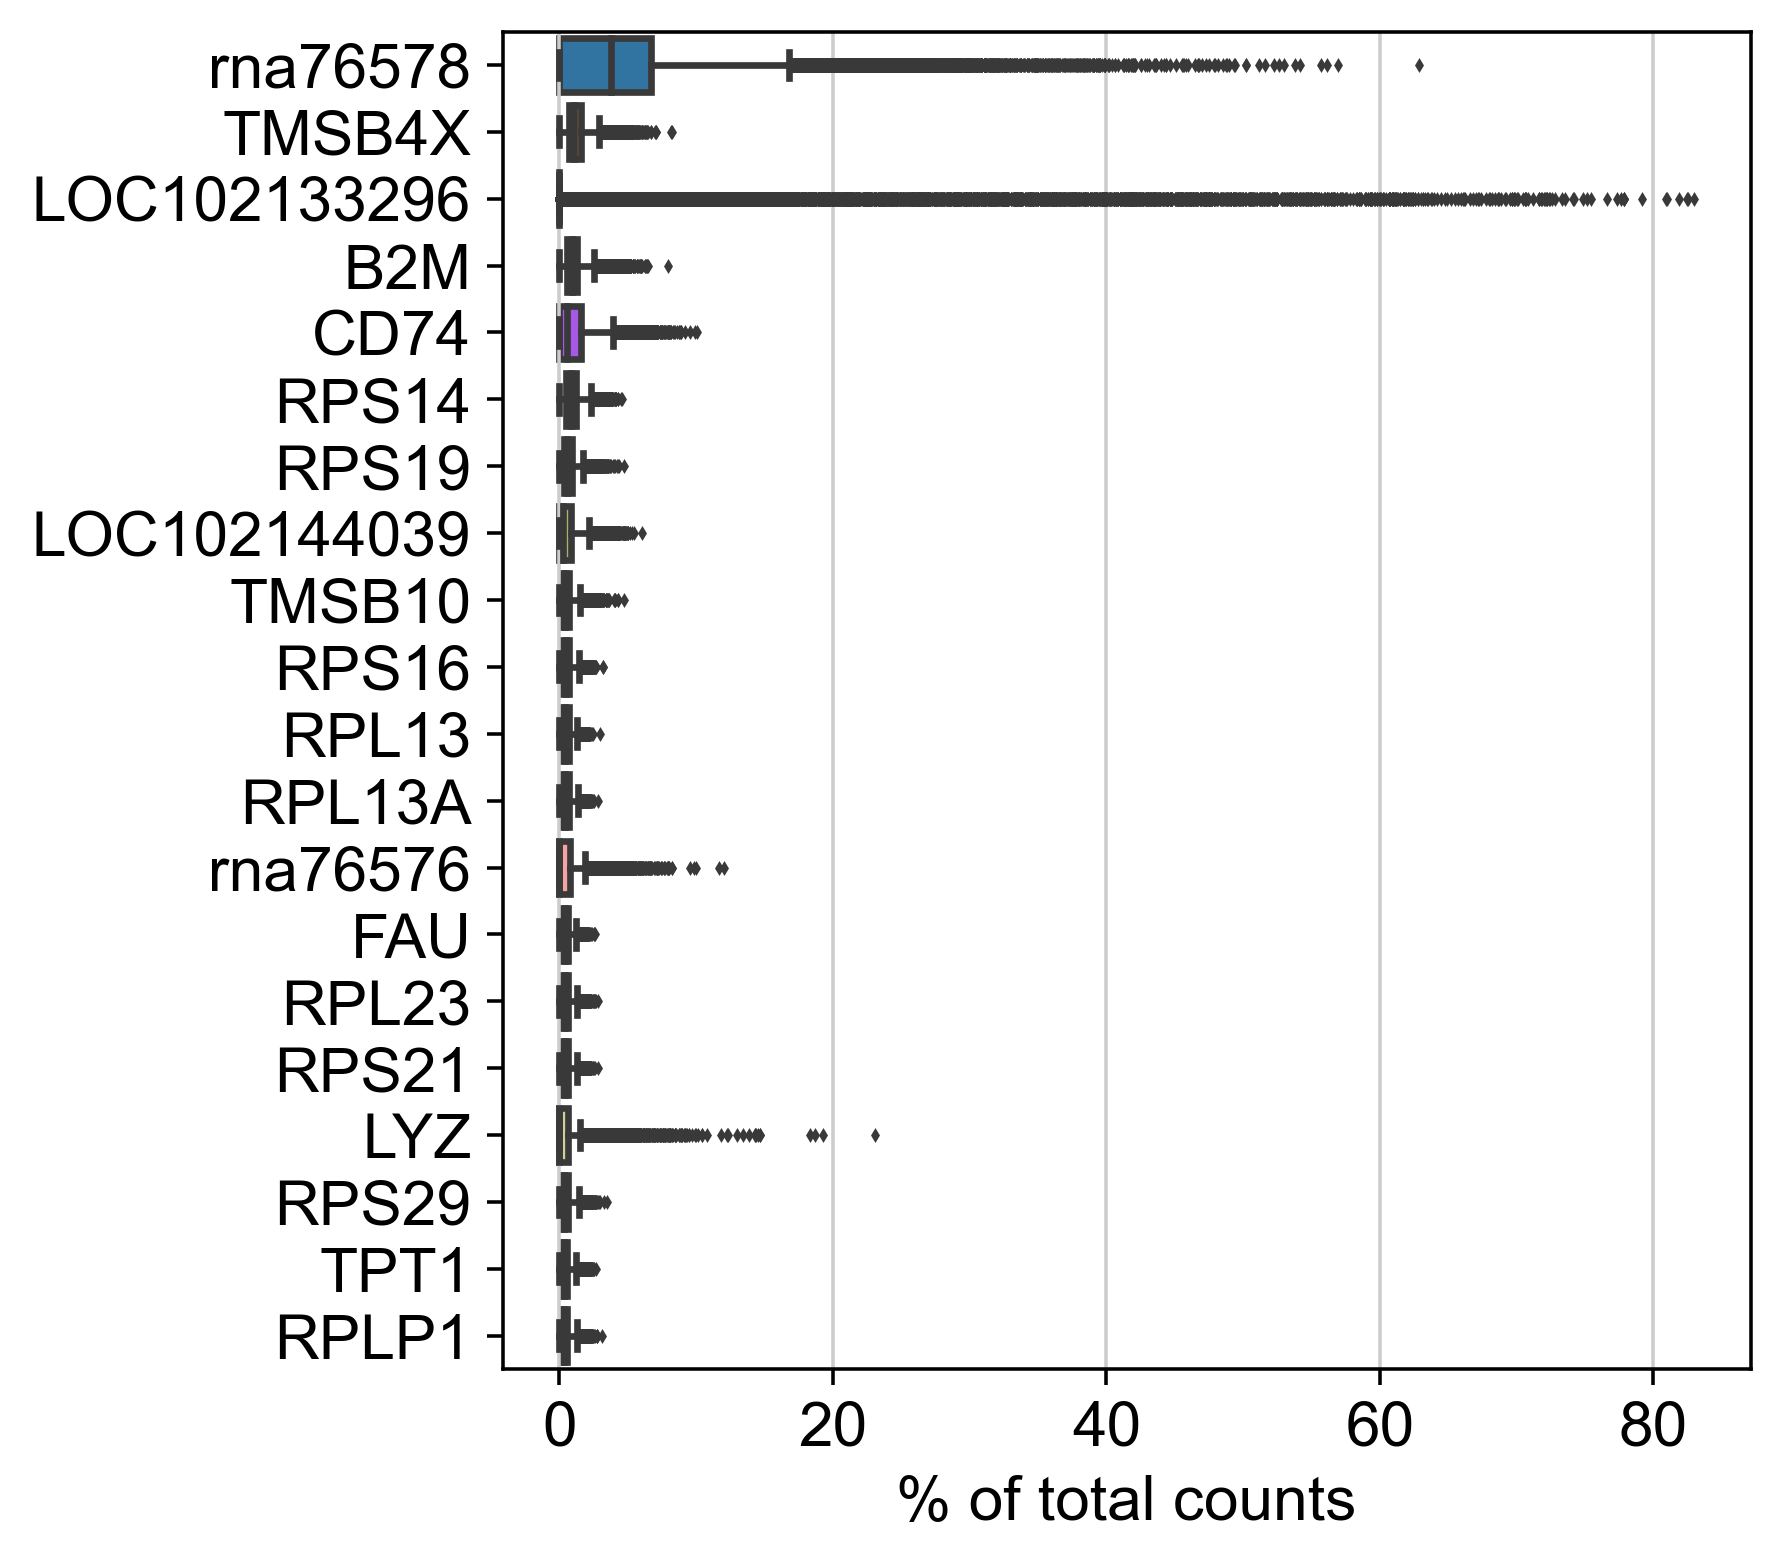

In [19]:
sc.pl.highest_expr_genes(sample_object, n_top=20)

##### Initial filtering

- By genes

In [20]:
sc.pp.filter_cells(sample_object, min_genes=200)

filtered out 283 cells that have less than 200 genes expressed


- By cells

In [21]:
sc.pp.filter_genes(sample_object, min_cells=3)
sample_object.shape

filtered out 3551 genes that are detected in less than 3 cells


(119307, 27313)

### QC metrics

In [22]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^HB[^(P)]"))
sample_object.var

,gene_ids-1,n_cells,mt,ribo,hb
A1BG,NaN,4,False,False,False
A1CF,NaN,5,False,False,False
A2ML1,A2ML1,145,False,False,False
A3GALT2,A3GALT2,36,False,False,False
A4GALT,A4GALT,3264,False,False,False
...,...,...,...,...,...
rna76593,rna76593,4368,False,False,False
rna76594,rna76594,6941,False,False,False
rna76596,rna76596,7231,False,False,False
rna76597,NaN,5,False,False,False


In [23]:
sample_object.var['mt'].value_counts()

mt
False    27244
True        69
Name: count, dtype: int64

In [24]:
sample_object.var['ribo'].value_counts()

ribo
False    27222
True        91
Name: count, dtype: int64

In [25]:
sample_object.var['hb'].value_counts()

hb
False    27306
True         7
Name: count, dtype: int64

In [26]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [27]:
sample_object.obs

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,object_number,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
Array4_23118_TATTACCCCGCA-1,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4583,4583,16699.0,52.0,0.311396,313.0,1.874364,1.0,0.005988
Array4_23118_CTCTTCCGCCTA-1,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4321,4320,15943.0,47.0,0.294800,273.0,1.712350,1.0,0.006272
Array4_23118_CATGTCTCCTGC-1,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4839,4839,14979.0,35.0,0.233660,372.0,2.483477,16.0,0.106816
Array4_23118_GTAACTCCCCGA-1,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,3922,3922,12295.0,39.0,0.317202,227.0,1.846279,2.0,0.016267
Array4_23118_CGCCGTCTGATC-1,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4017,4017,12398.0,40.0,0.322633,187.0,1.508308,4.0,0.032263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array9_4017_TTTTTGAGGCCT-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,3,719,719,1524.0,1.0,0.065617,287.0,18.832020,1.0,0.065617
Array9_4017_TTTTTGGAAACC-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,3,685,685,1068.0,4.0,0.374532,75.0,7.022472,1.0,0.093633
Array9_4017_TTTTTGTGCCTC-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,3,1467,1467,4488.0,9.0,0.200535,930.0,20.721926,0.0,0.000000
Array9_4017_TTTTTTAAAGAT-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,3,690,690,1431.0,8.0,0.559050,242.0,16.911251,0.0,0.000000


- QC visualisation

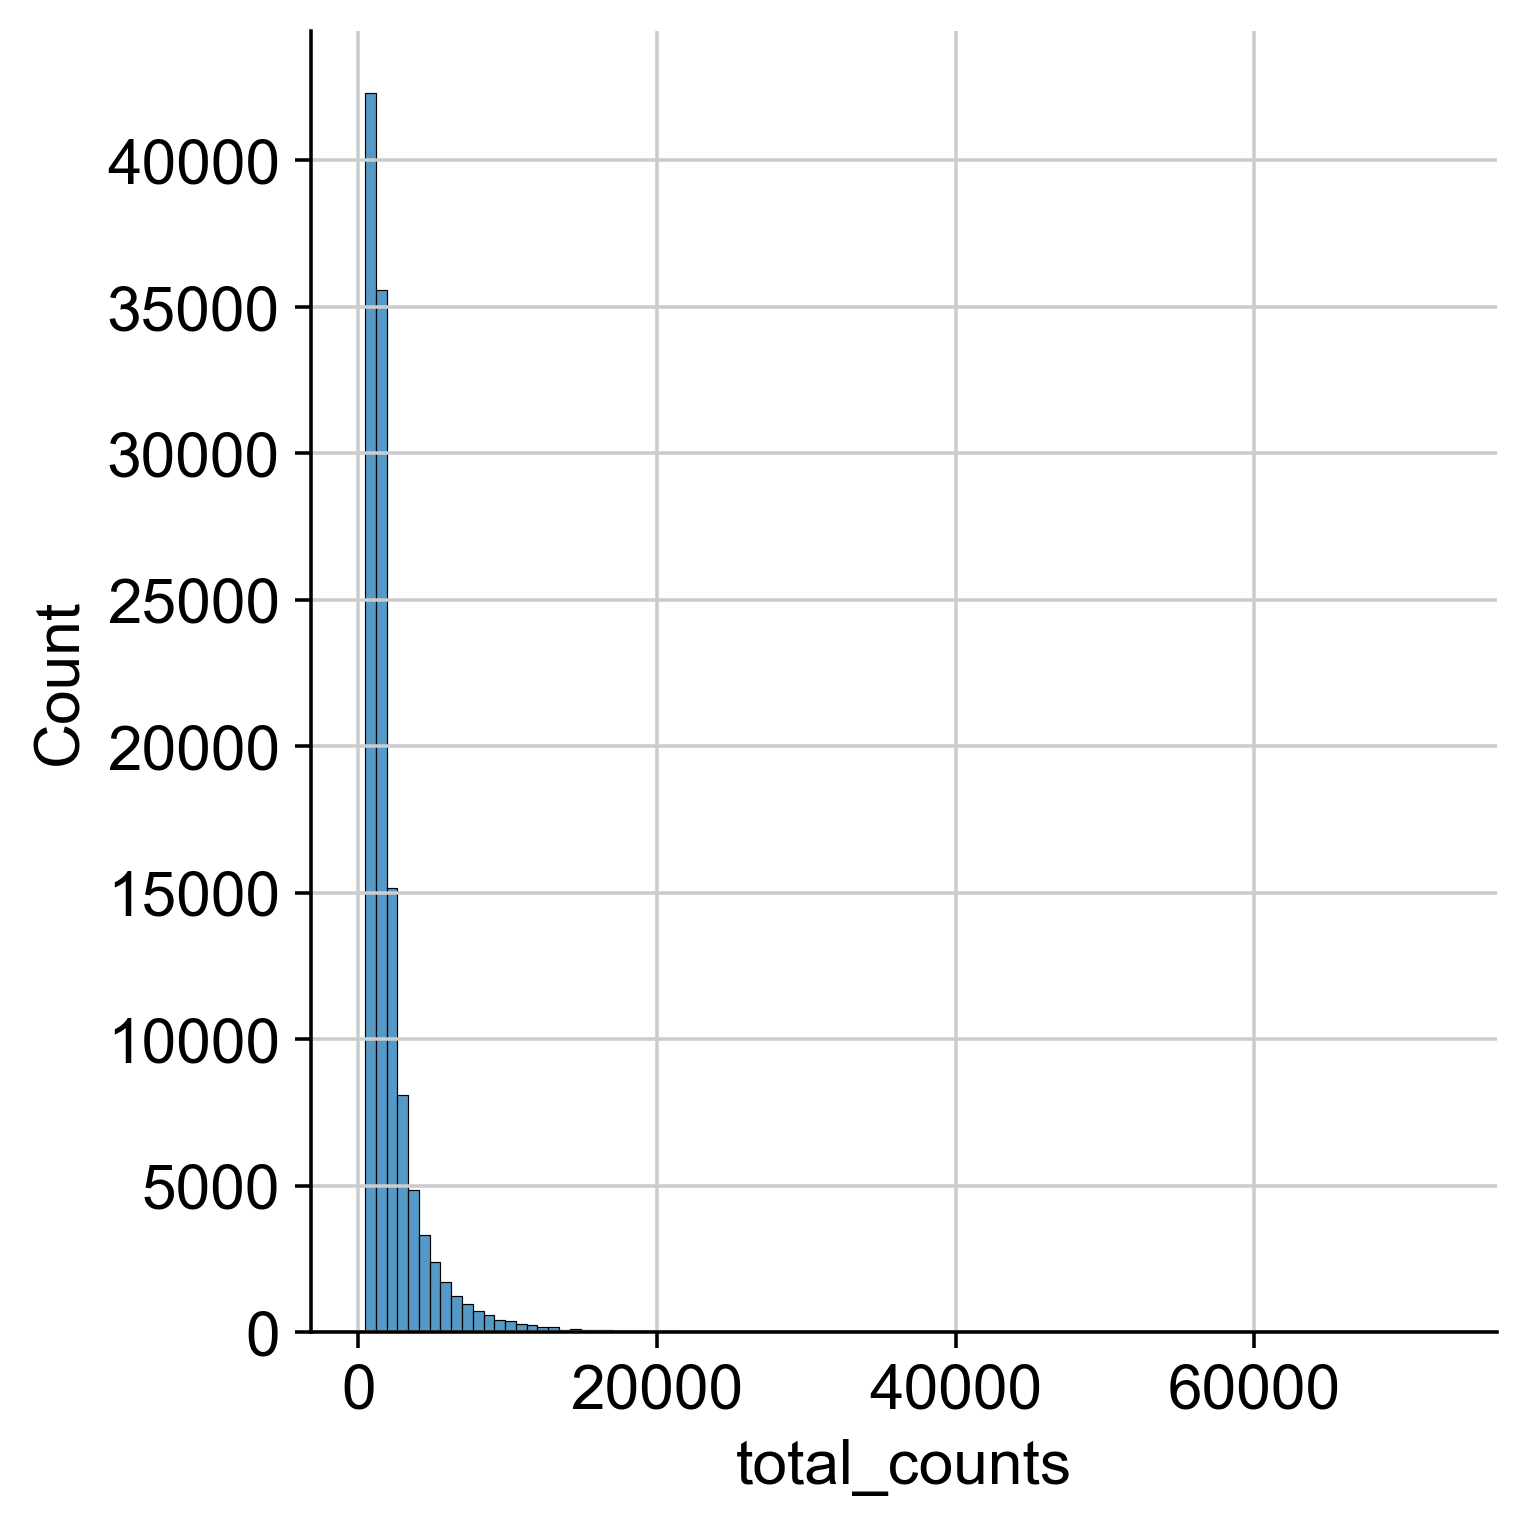

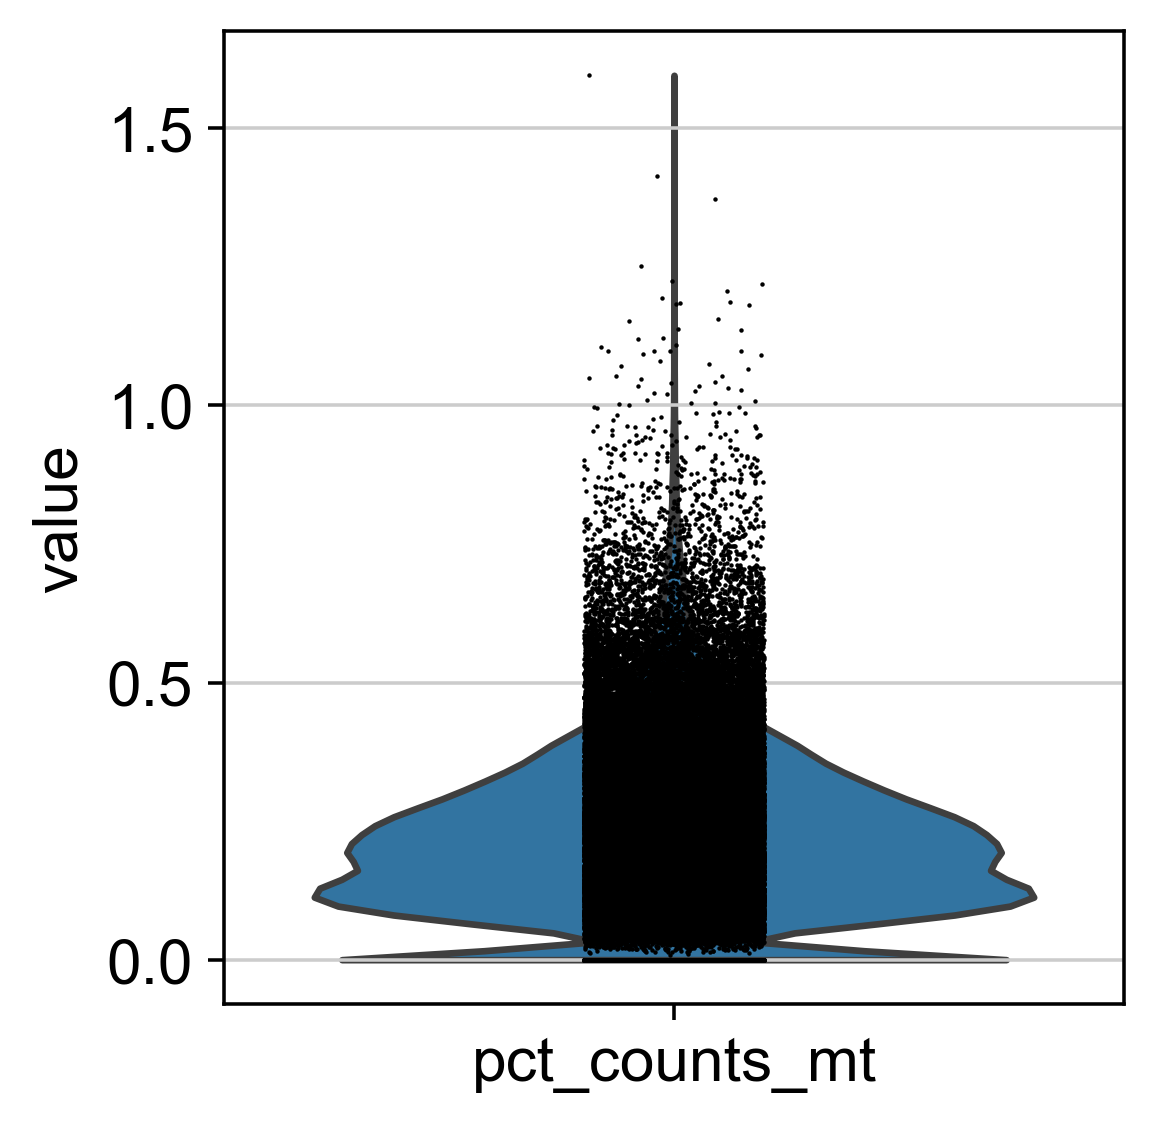

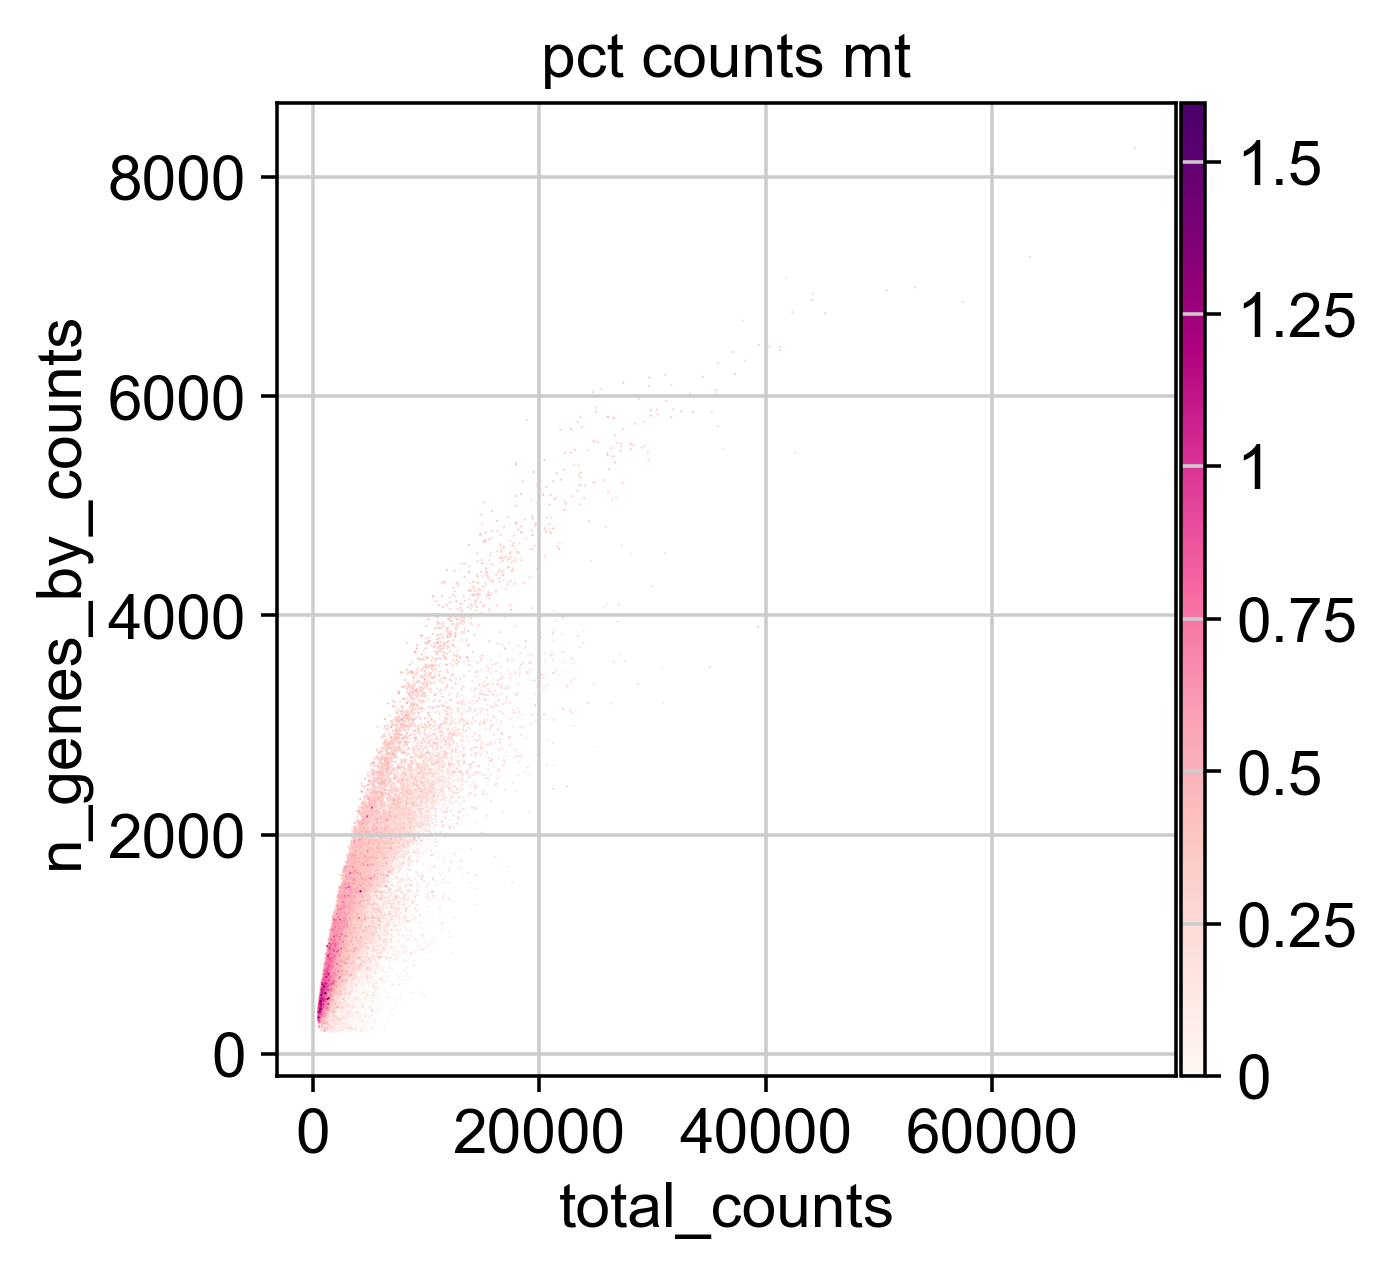

In [28]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

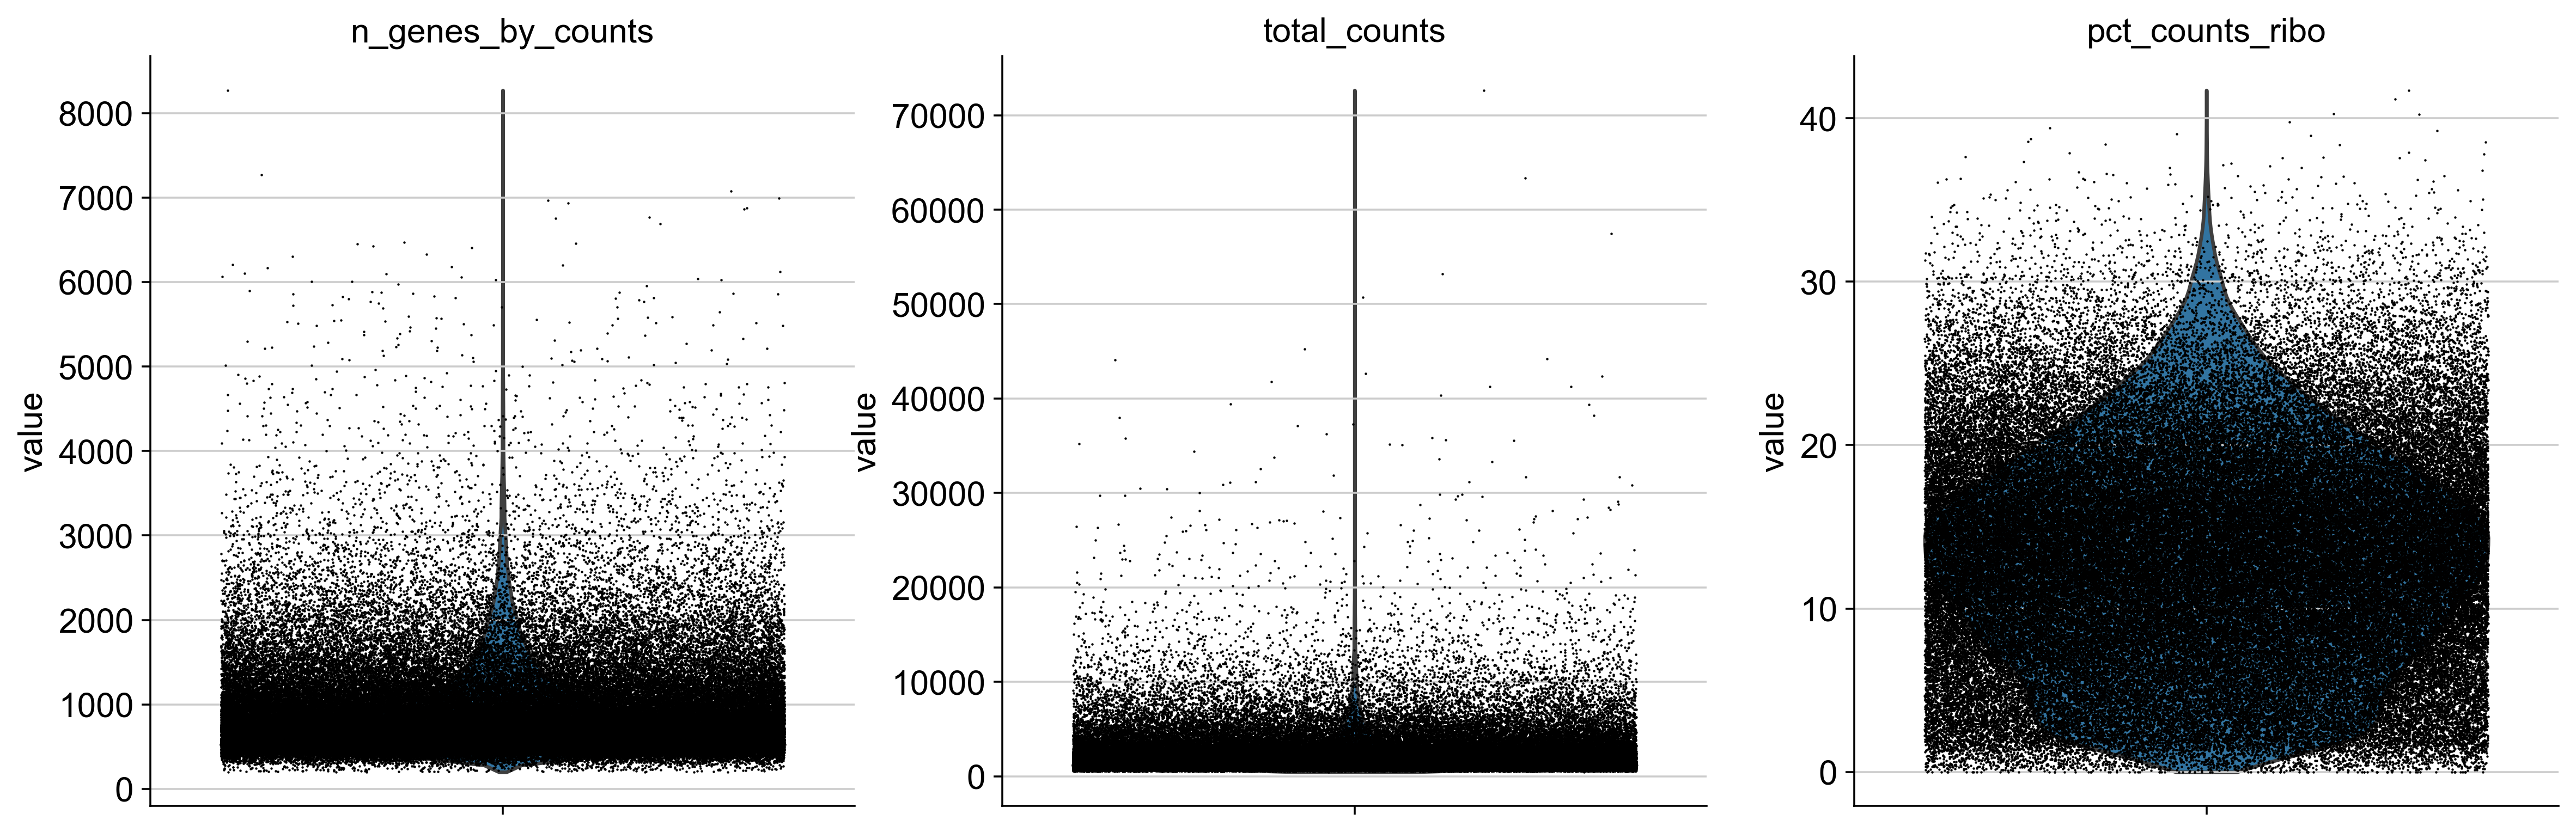

In [29]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

### QC-based filtering

In [30]:
sample_object.obs.head()

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,object_number,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
Array4_23118_TATTACCCCGCA-1,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4583,4583,16699.0,52.0,0.311396,313.0,1.874364,1.0,0.005988
Array4_23118_CTCTTCCGCCTA-1,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4321,4320,15943.0,47.0,0.294800,273.0,1.712350,1.0,0.006272
Array4_23118_CATGTCTCCTGC-1,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4839,4839,14979.0,35.0,0.233660,372.0,2.483477,16.0,0.106816
Array4_23118_GTAACTCCCCGA-1,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,3922,3922,12295.0,39.0,0.317202,227.0,1.846279,2.0,0.016267
Array4_23118_CGCCGTCTGATC-1,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1,4017,4017,12398.0,40.0,0.322633,187.0,1.508308,4.0,0.032263


In [31]:
sample_object.shape

(119307, 27313)

In [32]:
sample_object.obs["mt_ok"] = sample_object.obs['pct_counts_mt'] <= 20
sample_object.obs.head()

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,mt_ok
Array4_23118_TATTACCCCGCA-1,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,4583,4583,16699.0,52.0,0.311396,313.0,1.874364,1.0,0.005988,True
Array4_23118_CTCTTCCGCCTA-1,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,4321,4320,15943.0,47.0,0.294800,273.0,1.712350,1.0,0.006272,True
Array4_23118_CATGTCTCCTGC-1,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,4839,4839,14979.0,35.0,0.233660,372.0,2.483477,16.0,0.106816,True
Array4_23118_GTAACTCCCCGA-1,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,3922,3922,12295.0,39.0,0.317202,227.0,1.846279,2.0,0.016267,True
Array4_23118_CGCCGTCTGATC-1,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,4017,4017,12398.0,40.0,0.322633,187.0,1.508308,4.0,0.032263,True


In [33]:
sample_object.obs.mt_ok.value_counts()

mt_ok
True    119307
Name: count, dtype: int64

In [34]:
print(f"Total number of cells: {sample_object.n_obs}")
sample_object = sample_object[(sample_object.obs.mt_ok)].copy()

print(f"Number of cells after filtering of low quality cells: {sample_object.n_obs}")

Total number of cells: 119307
Number of cells after filtering of low quality cells: 119307


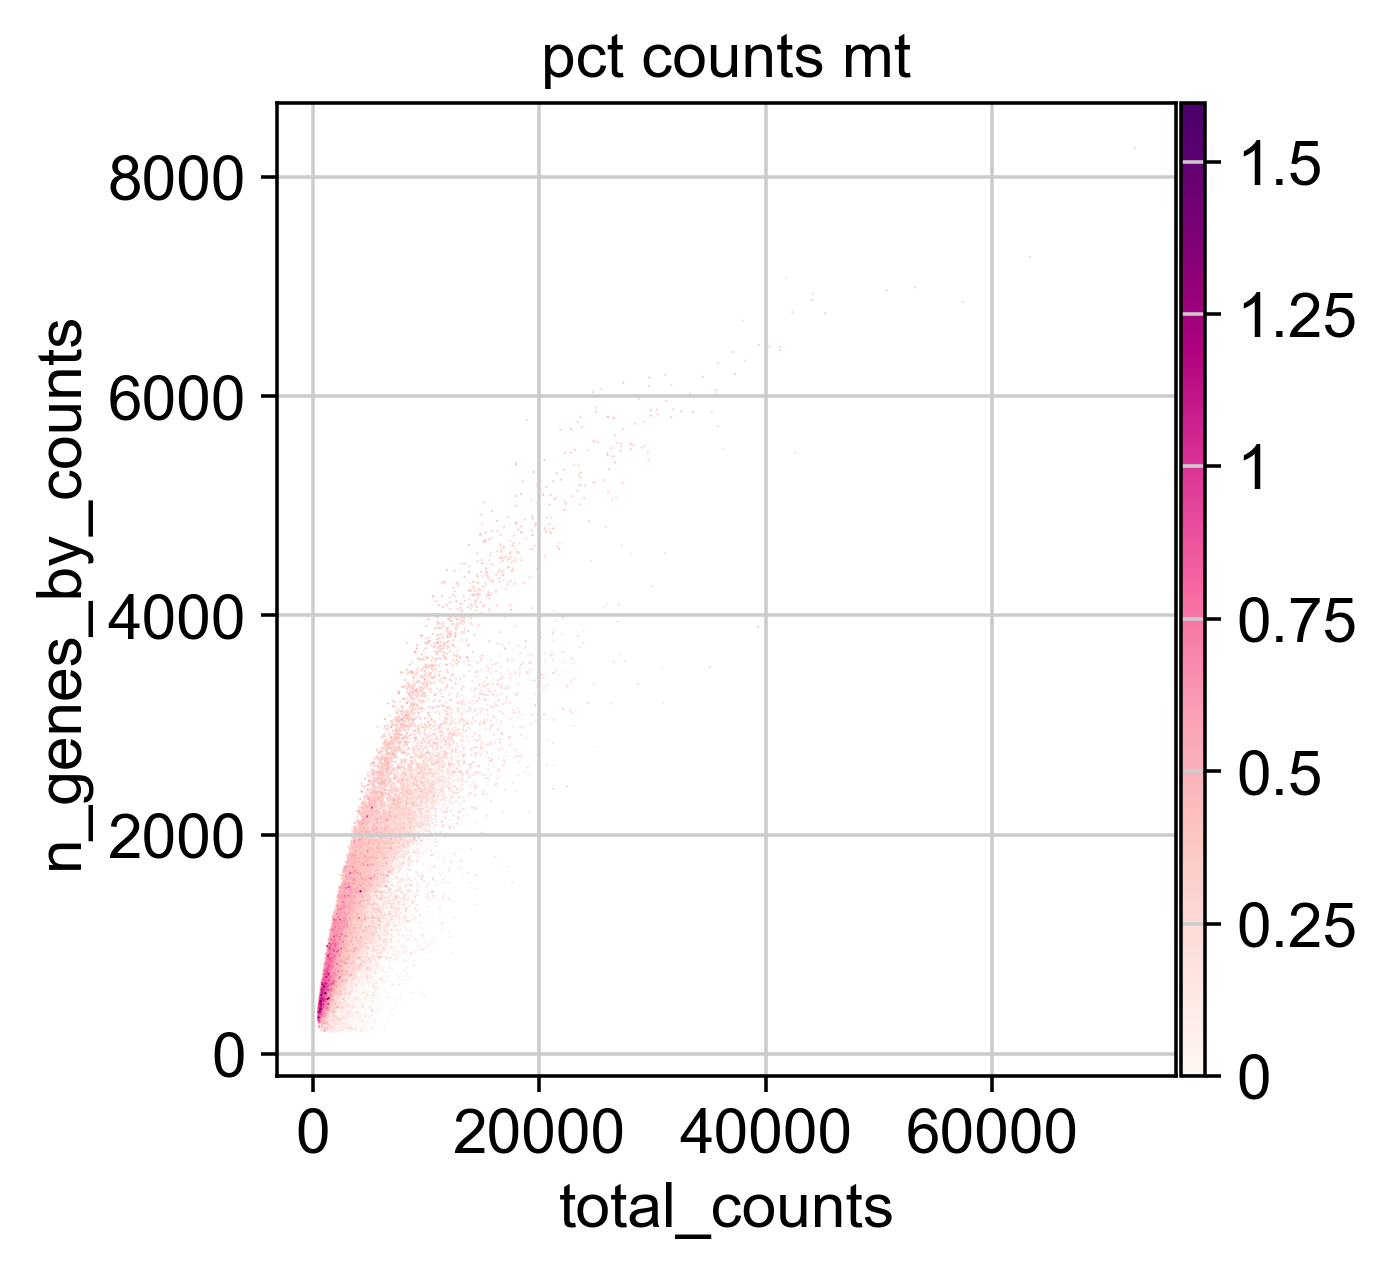

In [35]:
p1 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Sample sex covariate

In [36]:
annot = sc.queries.biomart_annotations(
        "mfascicularis",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("ensembl_gene_id")


In [37]:
annot.head()

,external_gene_name,start_position,end_position,chromosome_name
ensembl_gene_id,,,,
ENSMFAG00000055330,NaN,32222828,32225005,1
ENSMFAG00000052166,NaN,207191584,207193119,1
ENSMFAG00000048966,NaN,83610456,83611589,1
ENSMFAG00000056376,NaN,111229096,111230693,1
ENSMFAG00000063704,NaN,56043954,56045445,2


In [38]:
annot.chromosome_name.str.contains("Y").any()


False

- Y chrom

In [39]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index([], dtype='object')

In [40]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chromo

In [41]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index([], dtype='object')

In [42]:
chrX_sum = sample_object[:, chrX_genes].X.sum(axis=1)
total_sum = sample_object.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
sample_object.obs['percent_chrX'] = (np.asarray(chrX_sum).flatten() / np.asarray(total_sum).flatten()) * 100
sample_object.obs

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,mt_ok,percent_chrY,percent_chrX
Array4_23118_TATTACCCCGCA-1,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,16699.0,52.0,0.311396,313.0,1.874364,1.0,0.005988,True,0.0,0.0
Array4_23118_CTCTTCCGCCTA-1,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,15943.0,47.0,0.294800,273.0,1.712350,1.0,0.006272,True,0.0,0.0
Array4_23118_CATGTCTCCTGC-1,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,14979.0,35.0,0.233660,372.0,2.483477,16.0,0.106816,True,0.0,0.0
Array4_23118_GTAACTCCCCGA-1,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,12295.0,39.0,0.317202,227.0,1.846279,2.0,0.016267,True,0.0,0.0
Array4_23118_CGCCGTCTGATC-1,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,12398.0,40.0,0.322633,187.0,1.508308,4.0,0.032263,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array9_4017_TTTTTGAGGCCT-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1524.0,1.0,0.065617,287.0,18.832020,1.0,0.065617,True,0.0,0.0
Array9_4017_TTTTTGGAAACC-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1068.0,4.0,0.374532,75.0,7.022472,1.0,0.093633,True,0.0,0.0
Array9_4017_TTTTTGTGCCTC-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,4488.0,9.0,0.200535,930.0,20.721926,0.0,0.000000,True,0.0,0.0
Array9_4017_TTTTTTAAAGAT-3,NaN,NaN,Granuloma5,4017,NaN,NaN,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,1431.0,8.0,0.559050,242.0,16.911251,0.0,0.000000,True,0.0,0.0


In [43]:
# Graph of samples with X chrom
sample_object.obs.percent_chrX.value_counts()

percent_chrX
0.0    119307
Name: count, dtype: int64

In [44]:
sample_object.obs.shape

(119307, 52)

In [45]:
sample_object

AnnData object with n_obs × n_vars = 119307 × 27313
    obs: 'nCount_RNA', 'nFeature_RNA', 'biosample_id', 'donor_id', 'CellTypeAnnotations', 'Log10_CFU', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'sex', 'is_living', 'paired_ends', 'end_bias', 'biosample_type', 'disease__time_since_onset', 'disease__time_since_onset__unit', 'disease__time_since_onset__unit_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'CellID', 'GenericFinal', 'SpecificFinal', 'Log10_CFU_per_granuloma', 'Log10_CEQ_per_granuloma', 'log_CFU_CEQ_ratio_per_granuloma', 'Size_4_wks', 'Size_8_wks', 'Size_10_wks', 'SUV_4_wks', 'SUV_8_wks', 'SUV_10_wks', 'CellTypeGroup', 'GranulomaBurden', 'GranulomaTiming', 'object_number', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_h

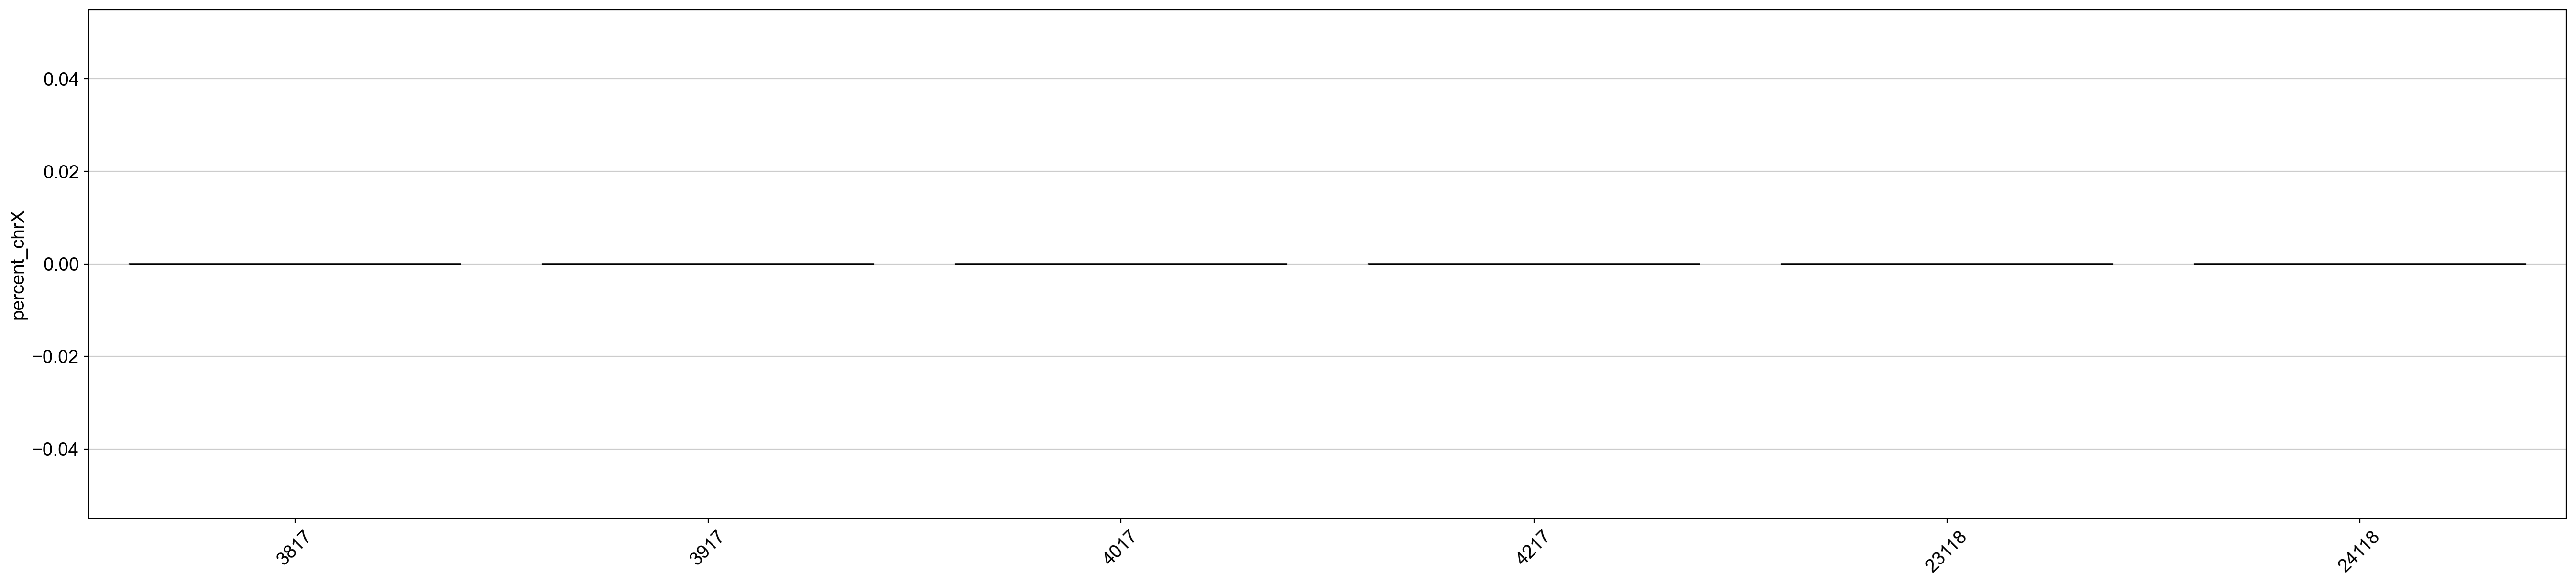

In [46]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX"], jitter = 0.4, groupby = 'donor_id', rotation = 45)

### Cell cycle scores

In [47]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/mfasc_orthog_cell_cycle_genes.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/mfasc_orthog_cell_cycle_genes.txt https://raw.githubusercontent.com/Talavera-Lopez-Lab/Mairi-PhD/main/sc_temp_folder/cell_cycle_genes/mfasc_orthog_cell_cycle_genes.txt?token=GHSAT0AAAAAACBVCJYZCXEBCEQZZKWQJC22ZD7AUZA

zsh:1: parse error near `https://raw.githubus...'


In [48]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/mfasc_orthog_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
g2m_genes = cell_cycle_genes[:46]
s_genes = cell_cycle_genes[46:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

88
87


In [49]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['ADAM23', 'AFF2', 'APOE', 'ARHGAP19', 'B2M', 'BPIFB1', 'CAMP', 'CCL1', 'CCL20', 'CD69', 'CD74', 'CGA', 'CHEK2', 'CHIT1', 'COL1A1', 'COL1A2', 'COL3A1', 'COX2', 'COX3', 'CP', 'CPA3', 'CST3', 'CTSB', 'CXCL10', 'CXCL8', 'CXCL9', 'DCN', 'FAM166A', 'FN1', 'GNLY', 'GZMA', 'GZMB', 'HBB', 'HOXB3', 'HSP90AA1', 'HSP90B1', 'HSPA5', 'IFI27', 'IFIT2', 'IFNG', 'IGFBP3', 'IL17F', 'IL1B', 'IL1RN', 'IL5', 'INSR', 'ISG15', 'ITLN1', 'JCHAIN', 'LOC101925240', 'LOC101925812', 'LOC102116064', 'LOC102116308', 'LOC102116444', 'LOC102116821', 'LOC102117009', 'LOC102117659', 'LOC102118223', 'LOC102119103', 'LOC102119605', 'LOC102119798', 'LOC102119992', 'LOC102120083', 'LOC102120126', 'LOC102120633', 'LOC102121713', 'LOC102121902', 'LOC102124737', 'LOC102124743', 'LOC102126084', 'LOC102126660', 'LOC102127014', 'LOC102127135', 'LOC102127888', 'LOC102128706', 'LOC102128716', 'LOC102129539',

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    501 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    460 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


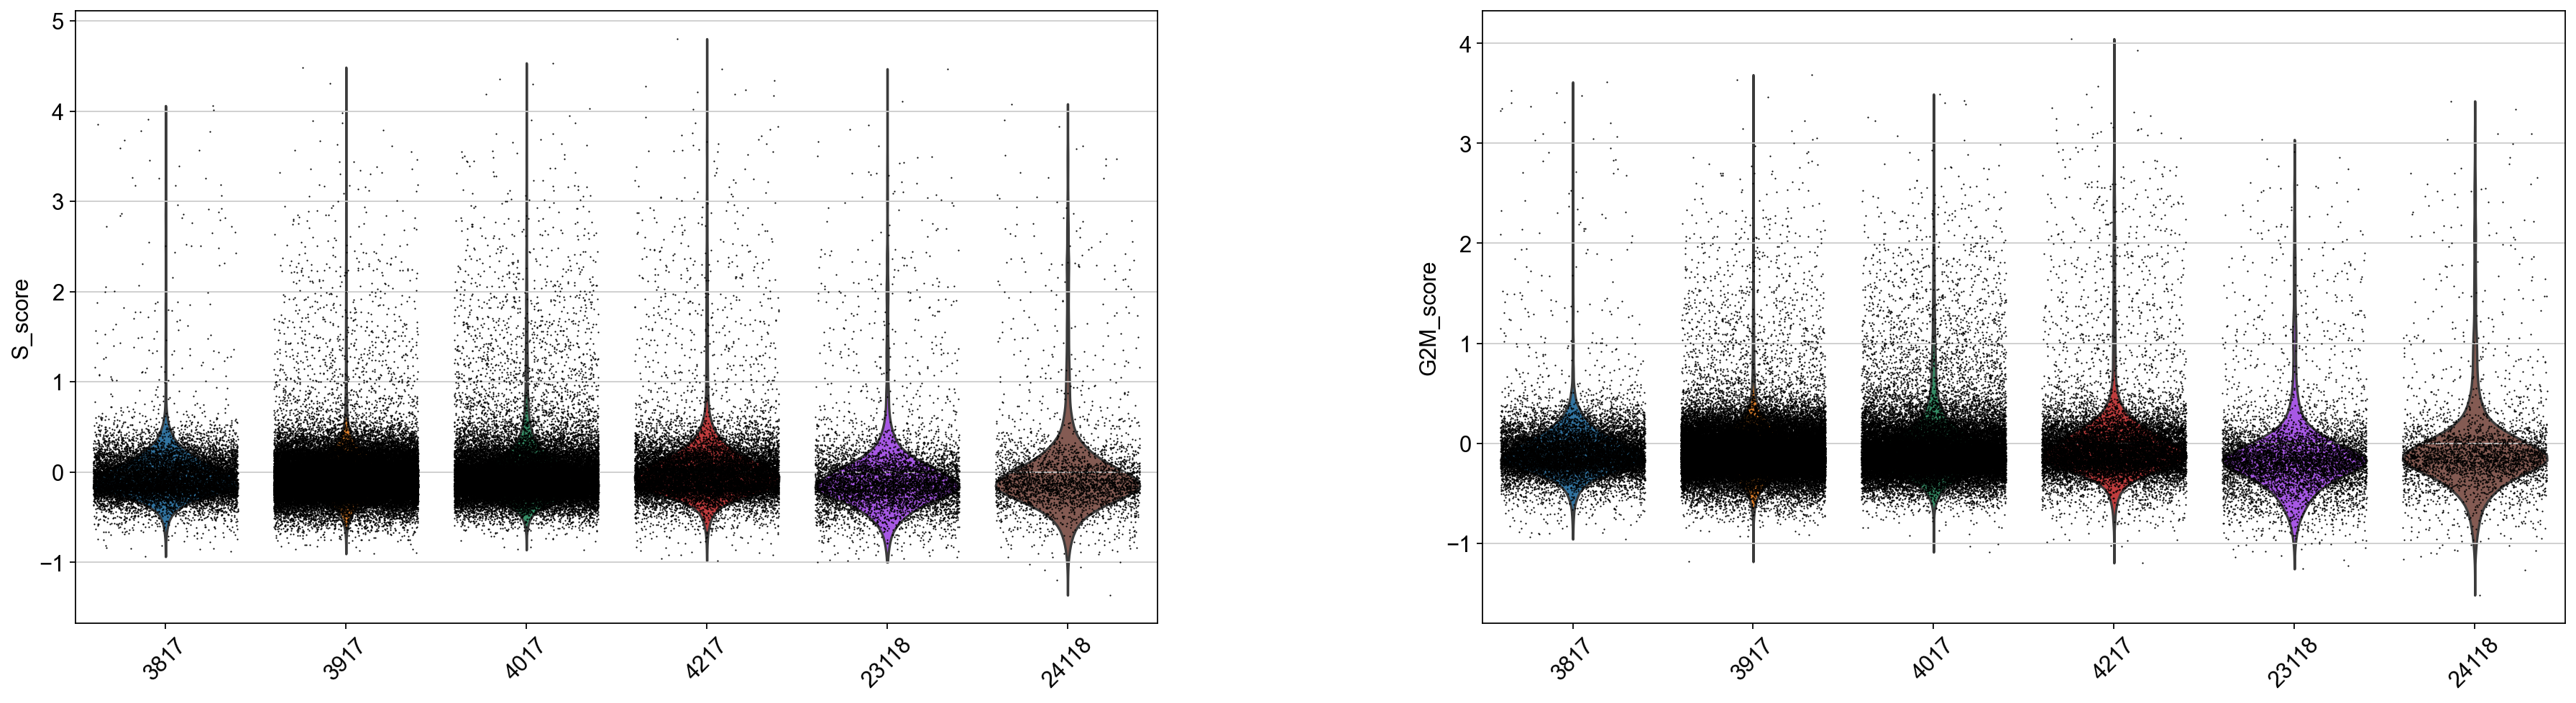

In [50]:
# Set specific figure params

sc.set_figure_params(figsize=(10, 7))
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor_id', rotation = 45)

In [51]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 119307 × 27313
    obs: 'nCount_RNA', 'nFeature_RNA', 'biosample_id', 'donor_id', 'CellTypeAnnotations', 'Log10_CFU', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'sex', 'is_living', 'paired_ends', 'end_bias', 'biosample_type', 'disease__time_since_onset', 'disease__time_since_onset__unit', 'disease__time_since_onset__unit_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'CellID', 'GenericFinal', 'SpecificFinal', 'Log10_CFU_per_granuloma', 'Log10_CEQ_per_granuloma', 'log_CFU_CEQ_ratio_per_granuloma', 'Size_4_wks', 'Size_8_wks', 'Size_10_wks', 'SUV_4_wks', 'SUV_8_wks', 'SUV_10_wks', 'CellTypeGroup', 'GranulomaBurden', 'GranulomaTiming', 'object_number', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_h

### Predict doublets

In [ ]:
scrub = scrublet.Scrublet(sample_object.X)

In [ ]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [ ]:
sum(sample_object.obs['predicted_doublets'])

In [ ]:
# Re-set figure params
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

# Plot doublet detection results
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'part', rotation = 45, multi_panel=False)

### Prepare counts for individual slots

In [ ]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

### Export object

In [ ]:
sample_object.write('/Volumes/Lacie/data_lake/Mairi_example/processed_files/abridged_qc/nhp/Hughes2020_scrna_wholelung_mm_230403_qcd.h5ad')